# Materials API Try1

Band gap info: {'direct': False, 'energy': 5.5175, 'transition': '(-0.400,0.600,0.000)-\\Gamma'}


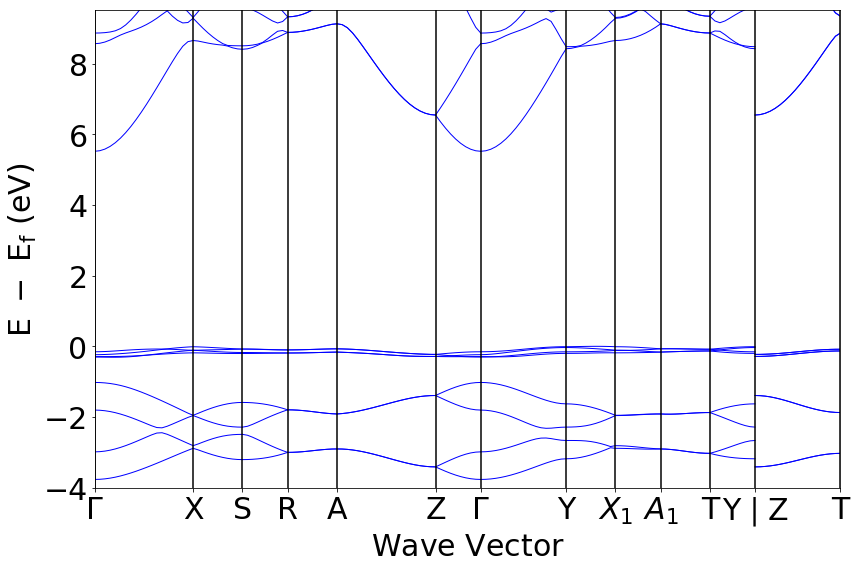

In [5]:
"""
This example prints out a band structure object of a Materials Project entry.
To run this example, you should:
* have pymatgen (www.pymatgen.org) installed
* obtain a Materials Project API key (https://www.materialsproject.org/open)
* paste that API key in the MAPI_KEY variable below, e.g. MAPI_KEY = "foobar1234"
as well as:
* update MP_ID with the Materials Project id of the compound
For citation, see https://www.materialsproject.org/citing
"""

from pymatgen import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter

if __name__ == "__main__":
    MAPI_KEY = "BsTwIdAypx0Far6t"  # You must change this to your Materials API key! (or set MAPI_KEY env variable)
    MP_ID = "mp-697111"  # You must change this to the mp-id of your compound of interest

    mpr = MPRester(MAPI_KEY)  # object for connecting to MP Rest interface

    my_bs = mpr.get_bandstructure_by_material_id(MP_ID)
    print('Band gap info: {}'.format(my_bs.get_band_gap()))
    BSPlotter(my_bs).show()

In [7]:
import requests
authenKey = "BsTwIdAypx0Far6t"

In [8]:
def getUrl(ion_name):
    return "https://www.materialsproject.org/rest/v1/materials/" + ion_name + "/vasp?API_KEY=" + authenKey;

In [22]:
r = requests.get(getUrl("FeO2"))
#r = requests.get("https://materialsproject.org/#search/materials/{%22nelements%22%3A2%2C%22elements%22%3A%22Fe-O%22}")

In [23]:
r.status_code

200

In [24]:
r.headers['content-type']

'application/json'

In [27]:
json = r.json()

In [28]:
sub_dict = json['response'][0]

In [29]:
for k in sub_dict.keys():
    print(k, "-->" , sub_dict[k])
    print()

diel --> None

icsd_ids --> []

energy --> -73.78972864

elasticity --> None

unit_cell_formula --> {'Fe': 4.0, 'O': 8.0}

oxide_type --> oxide

hubbards --> {'Fe': 5.3, 'O': 0.0}

task_ids --> ['mvc-12905']

piezo --> None

band_gap --> 0

e_above_hull --> 0.15376245562499946

nsites --> 12

icsd_id --> None

elements --> ['Fe', 'O']

tags --> None

pretty_formula --> FeO2

volume --> 153.98082316820518

total_magnetization --> 16.0000009

is_hubbard --> True

formation_energy_per_atom --> -1.4176423908333338

cif --> #\#CIF1.1
##########################################################################
#               Crystallographic Information Format file 
#               Produced by PyCifRW module
# 
#  This is a CIF file.  CIF has been adopted by the International
#  Union of Crystallography as the standard for data archiving and 
#  transmission.
#
#  For information on this file format, follow the CIF links at
#  http://www.iucr.org
##############################################

In [33]:
api_check_r = requests.get("https://www.materialsproject.org/rest/v1/api_check?API_KEY="+authenKey)

In [34]:
api_check_r.json()

{'api_key_valid': True, 'valid_response': True}

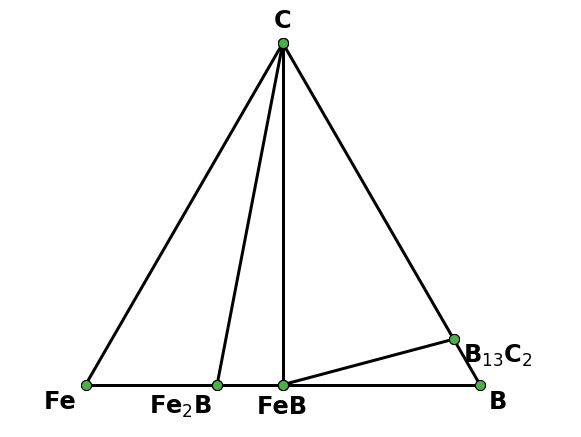

In [37]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

#This initializes the REST adaptor. Put your own API key in.
a = MPRester(authenKey)
 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the Ca-C-O system.
entries = a.get_entries_in_chemsys(['Fe', 'C', 'B'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show() 

In [38]:
id_r = requests.get("https://www.materialsproject.org/rest/v2/materials/Fe2O3/mids")

In [42]:
id_r.json()

{'copyright': 'Materials Project, 2016',
 'created_at': '2018-05-09T10:47:32.403024',
 'response': ['mvc-12005',
  'mp-705773',
  'mp-715572',
  'mp-777192',
  'mp-716814',
  'mp-686969',
  'mp-628327',
  'mp-609465',
  'mp-24972',
  'mp-542309',
  'mp-715276',
  'mp-705547'],
 'valid_response': True,
 'version': {'db': '2.0.0', 'pymatgen': '2018.5.3', 'rest': '2.0'}}